In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [45]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [46]:
# Length of train data
len(X_train)

60000

In [47]:
# Length of test data
len(X_test)

10000

In [48]:
# Shape of data
X_train.shape

(60000, 28, 28)

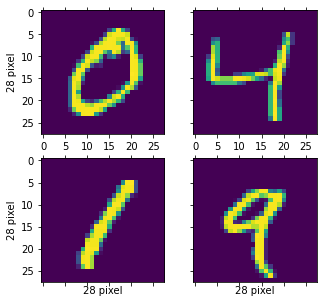

In [49]:
# Plotting some images of training dataset
r = 2
c = 2
diagram = 1
fig, axs = plt.subplots(r, c,figsize=(5,5))
for i in range(r):
    for j in range(c):
        axs[i][j].matshow(X_train[diagram])
        diagram+=1

for ax in axs.flat:
    ax.set(xlabel='28 pixel', ylabel='28 pixel')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [50]:
# Let's have a look at some y train values
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [51]:
# Scaling for better accuracy
X_train=X_train/255
X_test=X_test/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [52]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

In [53]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4866 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3063 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2849 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2743 - accuracy: 0.9249
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2679 - accuracy: 0.9259


In [54]:
# Checking Accuracy with our Test Data
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2668 - accuracy: 0.9273


[0.2668168842792511, 0.927299976348877]

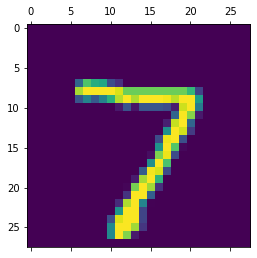

In [55]:
# Let's Predict value for 1st Image
plt.matshow(X_test[0])

In [58]:
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[0])
# Yaaahooo we got 7 as expected

7